<a href="https://colab.research.google.com/github/Oussama349/test/blob/main/checkpoint_logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

data=pd.read_csv('logistic_regression_dataset.csv')
data.head()
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   sex              4238 non-null   object 
 4   is_smoking       4238 non-null   object 
 5   cigsPerDay       4209 non-null   float64
 6   BPMeds           4185 non-null   float64
 7   prevalentStroke  4238 non-null   int64  
 8   prevalentHyp     4238 non-null   int64  
 9   diabetes         4238 non-null   int64  
 10  totChol          4188 non-null   float64
 11  sysBP            4238 non-null   float64
 12  diaBP            4238 non-null   float64
 13  BMI              4219 non-null   float64
 14  heartRate        4237 non-null   float64
 15  glucose          3850 non-null   float64
 16  TenYearCHD       3390 non-null   float64
dtypes: float64(10)

,id,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,3390.000000
mean,2118.500000,49.584946,1.978950,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.150737
std,1223.549549,8.572160,1.019791,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.357846
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,1059.250000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,2118.500000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,3177.750000,56.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,4237.000000,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
data.tail()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN
4237,4237,56,NaN,M,YES,25.0,0.0,0,0,0,255.0,138.0,80.0,23.44,67.0,79.0,NaN


In [ ]:
data.isnull().sum()

,0
id,0
age,0
education,105
sex,0
is_smoking,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0


In [ ]:
data1 = data.drop(columns=['id'])
data1


,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1.0
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,46,3.0,F,NO,0.0,0.0,0,0,0,277.0,122.5,77.5,27.42,63.0,77.0,NaN
4234,58,2.0,F,NO,0.0,0.0,0,0,0,190.0,132.0,67.0,23.08,65.0,70.0,NaN
4235,55,1.0,M,NO,0.0,0.0,0,0,0,199.0,134.0,80.0,26.41,120.0,NaN,NaN
4236,45,3.0,F,NO,0.0,0.0,0,1,0,231.0,157.5,104.5,22.86,75.0,92.0,NaN


In [ ]:
data1['education']=data1['education'].fillna(data['education'].mean())
data1.isnull().sum()

,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,29
BPMeds,53
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,50


In [ ]:
data1= data1.dropna(subset=['cigsPerDay'])
data1= data1.dropna(subset=['BPMeds'])
data1= data1.dropna(subset=['totChol'])
data1= data1.dropna(subset=['BMI'])
data1= data1.dropna(subset=['heartRate'])
data1= data1.dropna(subset=['glucose'])
data1= data1.dropna(subset=['TenYearCHD'])




data1.isnull().sum()

,0
age,0
education,0
sex,0
is_smoking,0
cigsPerDay,0
BPMeds,0
prevalentStroke,0
prevalentHyp,0
diabetes,0
totChol,0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3004 non-null   int64  
 1   education        3004 non-null   float64
 2   sex              3004 non-null   object 
 3   is_smoking       3004 non-null   object 
 4   cigsPerDay       3004 non-null   float64
 5   BPMeds           3004 non-null   float64
 6   prevalentStroke  3004 non-null   int64  
 7   prevalentHyp     3004 non-null   int64  
 8   diabetes         3004 non-null   int64  
 9   totChol          3004 non-null   float64
 10  sysBP            3004 non-null   float64
 11  diaBP            3004 non-null   float64
 12  BMI              3004 non-null   float64
 13  heartRate        3004 non-null   float64
 14  glucose          3004 non-null   float64
 15  TenYearCHD       3004 non-null   float64
dtypes: float64(10), int64(4), object(2)
memory usage: 399.0+ KB


In [ ]:
data1['sex'] = data1['sex'].str.strip().str.upper().map({'M': 1, 'F': 2})
data1

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,46,1.0,2,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,50,1.0,1,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,64,1.0,2,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,61,3.0,2,NO,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,2,NO,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0.0
3385,60,1.0,2,NO,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0.0
3386,46,1.0,2,NO,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0.0
3387,44,3.0,1,YES,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1.0


In [ ]:
data1['is_smoking'] = data1['is_smoking'].str.strip().str.lower().map({'yes': 1, 'no': 2})
data1

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,1,2,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0.0
2,46,1.0,2,1,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0.0
3,50,1.0,1,1,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1.0
4,64,1.0,2,1,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0.0
5,61,3.0,2,2,0.0,0.0,0,1,0,272.0,182.0,121.0,32.80,85.0,65.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3384,61,1.0,2,2,0.0,0.0,0,1,0,217.0,182.0,86.0,26.98,105.0,113.0,0.0
3385,60,1.0,2,2,0.0,0.0,0,0,0,261.0,123.5,79.0,29.28,70.0,103.0,0.0
3386,46,1.0,2,2,0.0,0.0,0,0,0,199.0,102.0,56.0,21.96,80.0,84.0,0.0
3387,44,3.0,1,1,3.0,0.0,0,1,0,352.0,164.0,119.0,28.92,73.0,72.0,1.0


In [ ]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3004 entries, 1 to 3389
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              3004 non-null   int64  
 1   education        3004 non-null   float64
 2   sex              3004 non-null   int64  
 3   is_smoking       3004 non-null   int64  
 4   cigsPerDay       3004 non-null   float64
 5   BPMeds           3004 non-null   float64
 6   prevalentStroke  3004 non-null   int64  
 7   prevalentHyp     3004 non-null   int64  
 8   diabetes         3004 non-null   int64  
 9   totChol          3004 non-null   float64
 10  sysBP            3004 non-null   float64
 11  diaBP            3004 non-null   float64
 12  BMI              3004 non-null   float64
 13  heartRate        3004 non-null   float64
 14  glucose          3004 non-null   float64
 15  TenYearCHD       3004 non-null   float64
dtypes: float64(10), int64(6)
memory usage: 399.0 KB


In [ ]:

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
correlation_matrix = data1.corr()
print(correlation_matrix)


                      age  education       sex  is_smoking  cigsPerDay  \
age              1.000000  -0.159175  0.035066    0.207227   -0.185938   
education       -0.159175   1.000000 -0.033453   -0.030420    0.015258   
sex              0.035066  -0.033453  1.000000    0.220060   -0.340404   
is_smoking       0.207227  -0.030420  0.220060    1.000000   -0.774886   
cigsPerDay      -0.185938   0.015258 -0.340404   -0.774886    1.000000   
BPMeds           0.135508  -0.023128  0.042196    0.042088   -0.037272   
prevalentStroke  0.048996  -0.027434  0.009291    0.050629   -0.046590   
prevalentHyp     0.310227  -0.081549 -0.001170    0.120520   -0.078206   
diabetes         0.112029  -0.053442 -0.005057    0.054754   -0.051627   
totChol          0.274599  -0.011233  0.070138    0.045961   -0.025286   
sysBP            0.402750  -0.129074  0.045783    0.146845   -0.102654   
diaBP            0.227066  -0.055479 -0.055504    0.128381   -0.066650   
BMI              0.139114  -0.129815 -

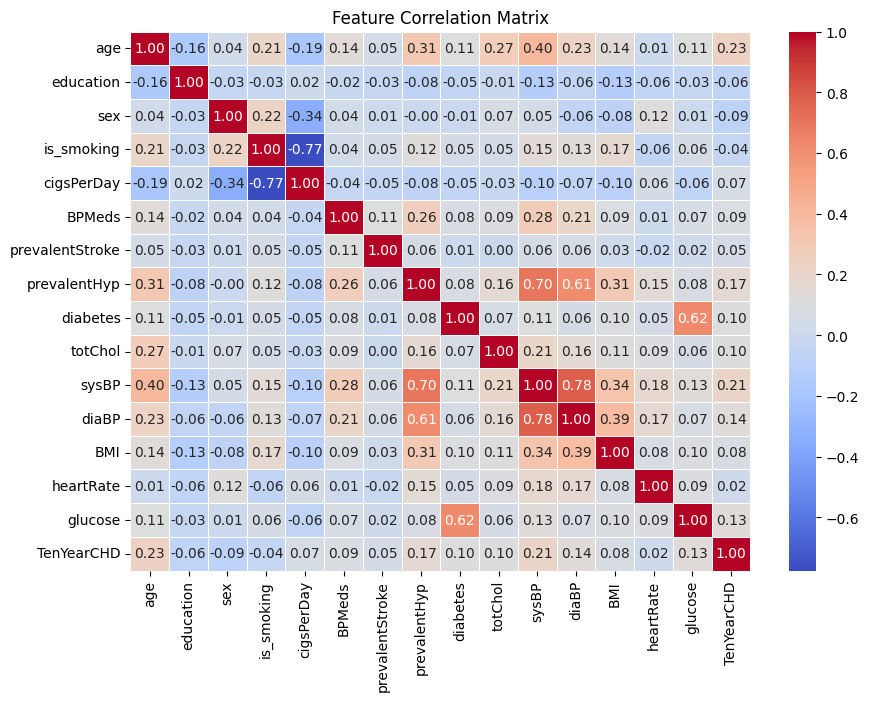

In [ ]:
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

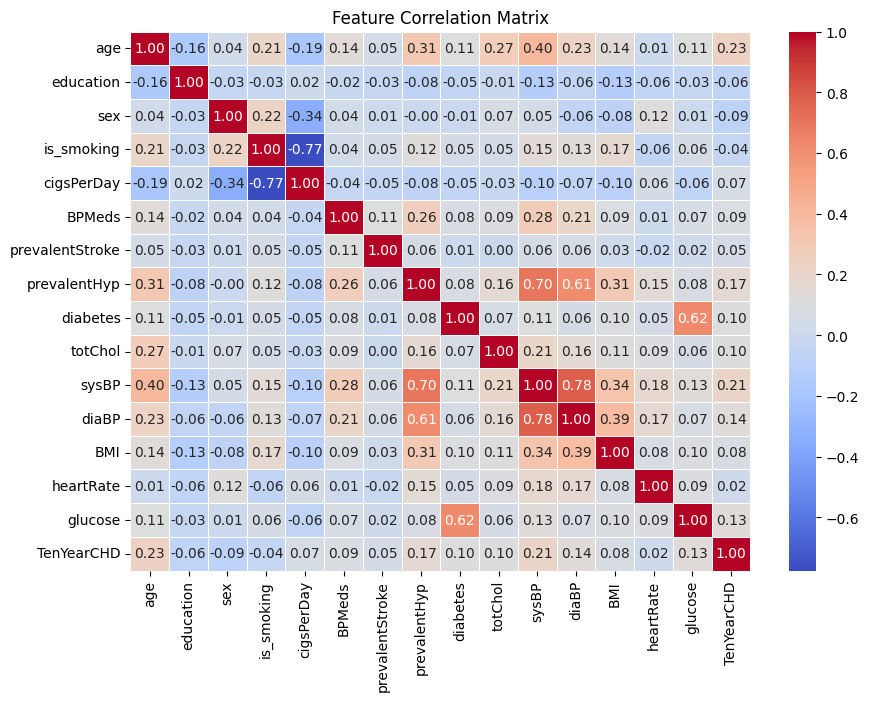

In [ ]:
correlation_matrix = data1.corr()
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()

In [ ]:
data1 = data1.drop(columns=['is_smoking'])
data1 = data1.drop(columns=['diabetes'])
data1 = data1.drop(columns=['heartRate'])
data1 = data1.drop(columns=['prevalentStroke'])
data1 = data1.drop(columns=['education'])
data1 = data1.drop(columns=['sex'])
data1 = data1.drop(columns=['BPMeds'])



In [ ]:
X = data1.drop('TenYearCHD', axis=1)
y = data1['TenYearCHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = model.predict(X_test_scaled)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")


Accuracy: 0.8703


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.87      0.99      0.93       778
         1.0       0.71      0.10      0.17       124

    accuracy                           0.87       902
   macro avg       0.79      0.55      0.55       902
weighted avg       0.85      0.87      0.83       902



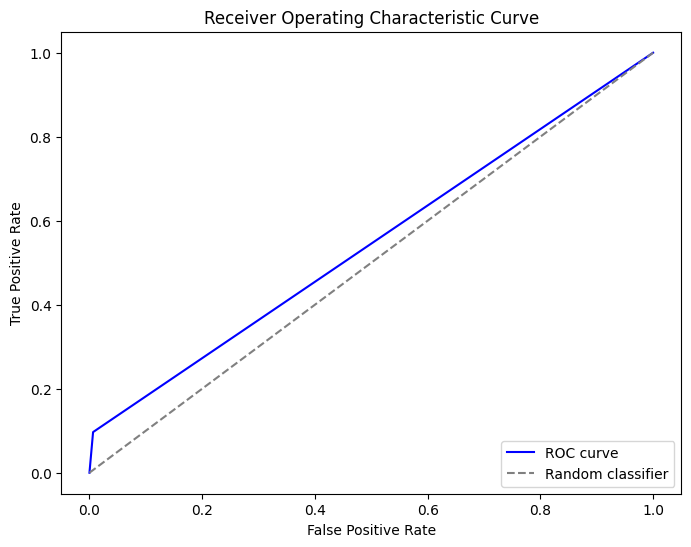

In [ ]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
import matplotlib.pyplot as plt

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic Curve')
plt.legend(loc='lower right')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score

# Calculate AUC
auc = roc_auc_score(y_test, y_pred)
print(f"AUC: {auc:.4f}")

AUC: 0.5452
